In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from midiutil import MIDIFile
import pygame
print("done")

pygame 2.6.1 (SDL 2.28.4, Python 3.13.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
done


In [2]:
# load audio
path='./audio/music/Brazil.mp3'

hop_length = 512
bpm=120
note_length_beats = 0.25

y,sr=librosa.load(path)

In [3]:
# track pitch
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, hop_length=hop_length) # this runs pitch detection for every time frame (there are 512 samples)
times = librosa.frames_to_time(np.arange(pitches.shape[1]), sr=sr, hop_length=hop_length)

# list to store notes
detected_notes = []
detected_times = []

# make MIDI file
midi = MIDIFile(1)
midi.addTempo(0,0,bpm)

In [4]:
# add notes to MIDI file
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax() # argmax() finds pitch bin with greatest magnitude
    pitch_hz = pitches[index, t]

    if pitch_hz > 0:
        midi_note = int(round(librosa.hz_to_midi(pitch_hz))) # if pitch>0, convert Hz to note name
        seconds = times[t]
        start_beat=seconds*(bpm/60)
        midi.addNote(track=0,channel=0, pitch=midi_note, time=start_beat, duration=note_length_beats, volume=100)
        detected_notes.append(midi_note)
        detected_times.append(seconds)

# save MIDI
with open("output.mid","wb") as f:
    midi.writeFile(f)

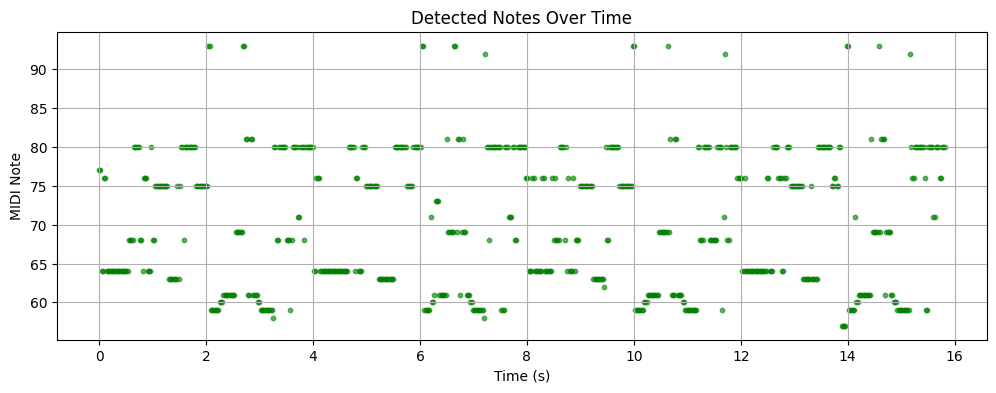

saved as output.mid


In [5]:
# plot notes
plt.figure(figsize=(12, 4))
plt.scatter(detected_times, detected_notes, s=10, c="green", alpha=0.6)
plt.xlabel("Time (s)")
plt.ylabel("MIDI Note")
plt.title("Detected Notes Over Time")
plt.grid(True)
plt.show()
print("saved as output.mid")

In [6]:
pygame.init()
pygame.mixer.init()

pygame.mixer.music.load("output.mid")
pygame.mixer.music.play()

while pygame.mixer.music.get_busy():
    pass